# PyTorch for Deep Learning & Machine Learning

Video: https://www.youtube.com/watch?v=V_xro1bcAuA

Resource Notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

---

In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cpu


# Tensors
### Creating tensor


## Introduction to tensors 

Now we've got PyTorch imported, it's time to learn about tensors.

Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

In tensor-speak (the language used to describe tensors), the tensor would have three dimensions, one for `colour_channels`, `height` and `width`.

But we're getting ahead of ourselves.

Let's learn more about tensors by coding them.


In [33]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [34]:
scalar.ndim #dimention

0

In [35]:
vector = torch.tensor([7,7])
vector.ndim

1

In [36]:
MATRIX = torch.tensor([[6,7,8],
                       [9,10,11]])
MATRIX.ndim

2

In [37]:
MATRIX.shape

torch.Size([2, 3])

In [38]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [39]:
TENSOR.ndim #by counting brakets

3

In [40]:
TENSOR.shape

torch.Size([1, 3, 3])

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)


| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) | 
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) | 

In [41]:
#random tensor
random_tensor = torch.rand(size=(3,4))
random_tensor, random_tensor.dtype, random_tensor.ndim

(tensor([[0.1715, 0.0684, 0.6353, 0.4485],
         [0.4551, 0.7931, 0.5944, 0.4061],
         [0.1330, 0.5727, 0.3616, 0.5307]]),
 torch.float32,
 2)

Random tensor in the common image shape of `[224, 224, 3]` (`[height, width, color_channels`]).

In [42]:
# Create a random tensor of size (224, 224, 3), 
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

random_image_size_tensor

tensor([[[0.1349, 0.5562, 0.3280],
         [0.0894, 0.8455, 0.5198],
         [0.9999, 0.5358, 0.6323],
         ...,
         [0.9390, 0.8385, 0.7395],
         [0.8072, 0.0212, 0.8286],
         [0.8178, 0.2848, 0.8671]],

        [[0.6775, 0.4241, 0.6322],
         [0.5306, 0.1636, 0.3203],
         [0.2352, 0.0568, 0.8714],
         ...,
         [0.2660, 0.6722, 0.9029],
         [0.3383, 0.6544, 0.7854],
         [0.3454, 0.8041, 0.1349]],

        [[0.2835, 0.9147, 0.6100],
         [0.3818, 0.7477, 0.0877],
         [0.4371, 0.3176, 0.5274],
         ...,
         [0.8672, 0.6804, 0.7363],
         [0.2008, 0.9518, 0.9964],
         [0.4504, 0.9715, 0.5988]],

        ...,

        [[0.8037, 0.9101, 0.7693],
         [0.6011, 0.5169, 0.4362],
         [0.9340, 0.3892, 0.7750],
         ...,
         [0.3042, 0.2523, 0.9433],
         [0.7095, 0.7545, 0.5600],
         [0.7830, 0.3005, 0.5210]],

        [[0.7080, 0.9698, 0.3817],
         [0.8930, 0.6212, 0.2488],
         [0.

### Zeros and ones

Sometimes you'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

Let's create a tensor full of zeros with [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html)

Again, the `size` parameter comes into play.

In [43]:
torch.zeros(size=(2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [44]:
torch.ones(size=(2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [45]:
arange = torch.arange(start=0, end=20, step=1)
reshaped = arange.view(4,-1)

reshaped

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor. 

To do so you can use [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like(input)`](https://pytorch.org/docs/1.9.1/generated/torch.ones_like.html) which return a tensor filled with zeros or ones in the same shape as the `input` respectively.

In [46]:
torch.zeros_like(reshaped)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

### Tensor datatypes

In [47]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is `torch.float32` and the other is `torch.float16` (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

We'll see more of this device talk later on.

For now let's create a tensor with `dtype=torch.float16`.

In [48]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Getting information from tensors

* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)


In [49]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.4782, 0.9510, 0.6411, 0.7889],
        [0.1994, 0.7894, 0.3379, 0.0610],
        [0.7875, 0.7714, 0.6767, 0.0221]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Manipulating tensors (tensor operations)

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

And that's it. Sure there are a few more here and there but these are the basic building blocks of neural networks.

Stacking these building blocks in the right way, you can create the most sophisticated of neural networks (just like lego!).

In [50]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [51]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [52]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [53]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

### Matrix multiplication & Dot product (is all you need)

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



Element wise Matric Multiplaication
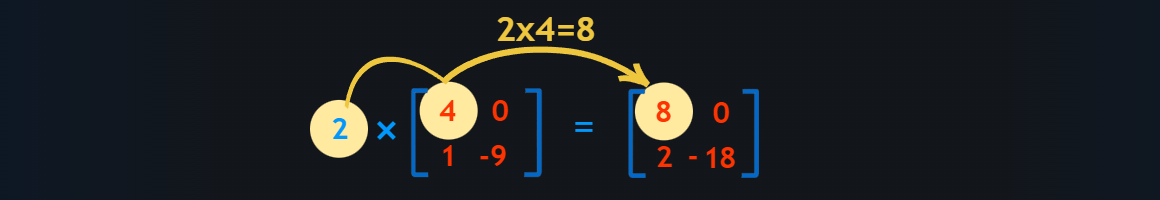

Dot product
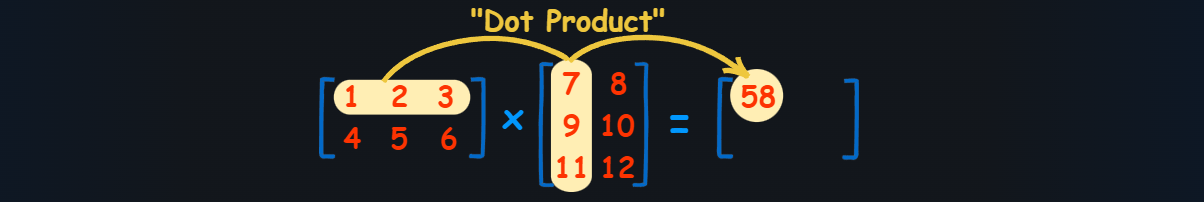

In [54]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [55]:
tensor

tensor([1, 2, 3])

In [56]:
tensor.matmul(tensor)

tensor(14)

In [57]:
#youcan also use @
tensor @ tensor

tensor(14)

In [58]:
# Matrixc multiplication by hand
1 * 1 + 2 * 2 + 3 * 3

14

In [59]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: total: 0 ns
Wall time: 0 ns


In [60]:
%%time
tensor.matmul(tensor) #dont show but its 10x faster

CPU times: total: 0 ns
Wall time: 0 ns


tensor(14)

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`


### One of most common errors:


In [61]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [92]:
tensor_A @ tensor_B.T

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


Without the transpose, the rules of matrix mulitplication aren't fulfilled and we get an error like above.

How about a visual? 

![visual demo of matrix multiplication](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

You can create your own matrix multiplication visuals like this at http://matrixmultiplication.xyz/.

> **Note:** A matrix multiplication like this is also referred to as the [**dot product**](https://www.mathsisfun.com/algebra/vectors-dot-product.html) of two matrices.



Neural networks are full of matrix multiplications and dot products.

The [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x\cdot{A^T} + b
$$

Where:
* `x` is the input to the layer (deep learning is a stack of layers like `torch.nn.Linear()` and others on top of each other).
* `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "`T`", that's because the weights matrix gets transposed).
  * **Note:** You might also often see `W` or another letter like `X` used to showcase the weights matrix.
* `b` is the bias term used to slightly offset the weights and inputs.
* `y` is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like $y = mx+b$ in high school or elsewhere), and can be used to draw a straight line!

Let's play around with a linear layer.

Try changing the values of `in_features` and `out_features` below and see what happens.

Do you notice anything to do with the shapes?


In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_fundamentals.ipynb#scrollTo=pjMmrJOOPv5e&line=1&uniqifier=1

### Finding the min, max, mean, sum, etc (aggregation)

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.





In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

#or


torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


(tensor(90), tensor(0), tensor(45.), tensor(450))

In [ ]:
# by using argmax and argmin you can get index of where those vals are
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Change tensor datatype

A common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) where the `dtype` parameter is the datatype you'd like to use.

First we'll create a tensor and check it's datatype (the default is `torch.float32`).


In [ ]:
tensor = torch.arange(0.,100.,2.)
tensor.dtype

torch.float32

In [ ]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
        28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54.,
        56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76., 78., 80., 82.,
        84., 86., 88., 90., 92., 94., 96., 98.], dtype=torch.float16)

In [ ]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
       dtype=torch.int8)

### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. | 
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. | 

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors. 

Let's try them out.

First, we'll create a tensor.

In [ ]:
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [ ]:
x_reshaped = x.reshape(1, -1)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [ ]:
#changing z changes x
z[0,0] = 1000
z,x

(tensor([[1000.,    2.,    3.,    4.,    5.,    6.,    7.]]),
 tensor([1000.,    2.,    3.,    4.,    5.,    6.,    7.]))

In [ ]:
# Change order of acis
x_original = torch.rand(size=(100, 200, 300))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 1, 0) # shifts axis, in order  of last mid first

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([100, 200, 300])
New shape: torch.Size([300, 200, 100])


## Indexing (selecting data from tensors)

Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.


In [ ]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
print(x[:, 0])

# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
print(x[:, :, 1])

# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
print(x[:, 1, 1])

# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
print(x[0, 0, :]) # same as x[0][0]

tensor([[1, 2, 3]])
tensor([[2, 5, 8]])
tensor([5])
tensor([1, 2, 3])


## PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.  

The two main methods you'll want to use for NumPy to PyTorch (and back again) are: 
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor. 
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

Let's try them out.

In [ ]:
# NUMPY -> TENSOR
array = np.arange(1.0,8.0)

tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# changing array keeps tensor
array = array + 100
array, tensor

(array([ 101.,  116.,  181.,  356.,  725., 1396., 2501.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# TENSOR -> NUMPY
tensor = torch.ones(7)
array = torch.Tensor.numpy(tensor)

array, tensor

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 tensor([1., 1., 1., 1., 1., 1., 1.]))

### Random Seeds

In [ ]:
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
torch.rand(3, 4)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

### GPU Related

In [ ]:
# Check for GPU
torch.cuda.is_available()

False

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Activation Functions:


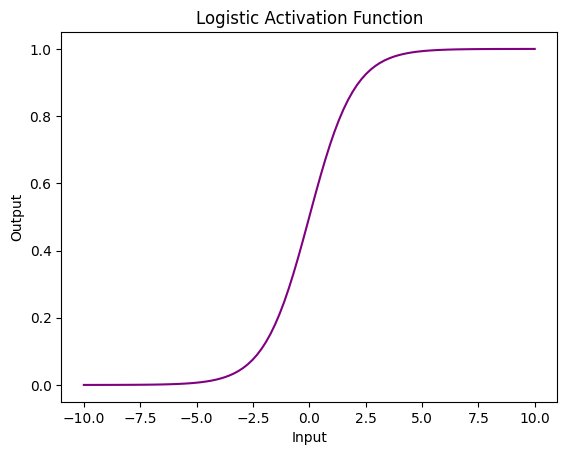

In [1]:

# importing the libraries
import torch
import matplotlib.pyplot as plt
 
# create a PyTorch tensor
x = torch.linspace(-10, 10, 100)
 
# apply the logistic activation function to the tensor
y = torch.sigmoid(x)
 
# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='purple')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Logistic Activation Function')
plt.show()

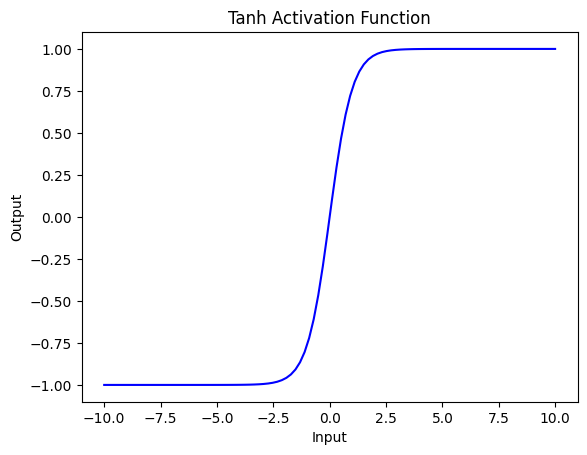

In [2]:
# apply the tanh activation function to the tensor
y = torch.tanh(x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Tanh Activation Function')
plt.show()

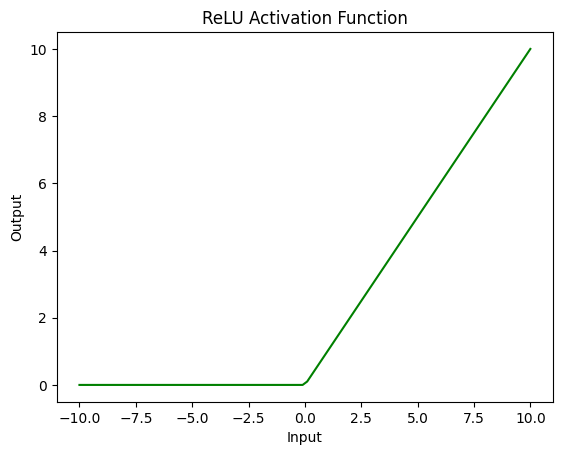

In [3]:
# apply the ReLU activation function to the tensor
y = torch.relu(x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='green')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.show()